In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import arrow
from pathlib import Path

In [2]:
grid_dir = Path("/ocean/atall/MOAD/grid/")
grid_map = Path("grid_from_lat_lon_mask999.nc")
grid_lons_lats = xr.open_dataset(grid_dir / grid_map)
meshmask = xr.open_dataset('/ocean/atall/MOAD/grid/mesh_mask_202310b.nc')
tmask = meshmask.tmask
mbathy = meshmask.mbathy


In [5]:
# Constant and data rang
syear = 2018
eyear = 2018
smonth = 1
emonth = 12
startdate = arrow.get(syear, smonth, 1)
enddate = arrow.get(eyear, emonth, 31)

2018-01-01T00:00:00+00:00 2018-12-31T00:00:00+00:00


... at the bottom


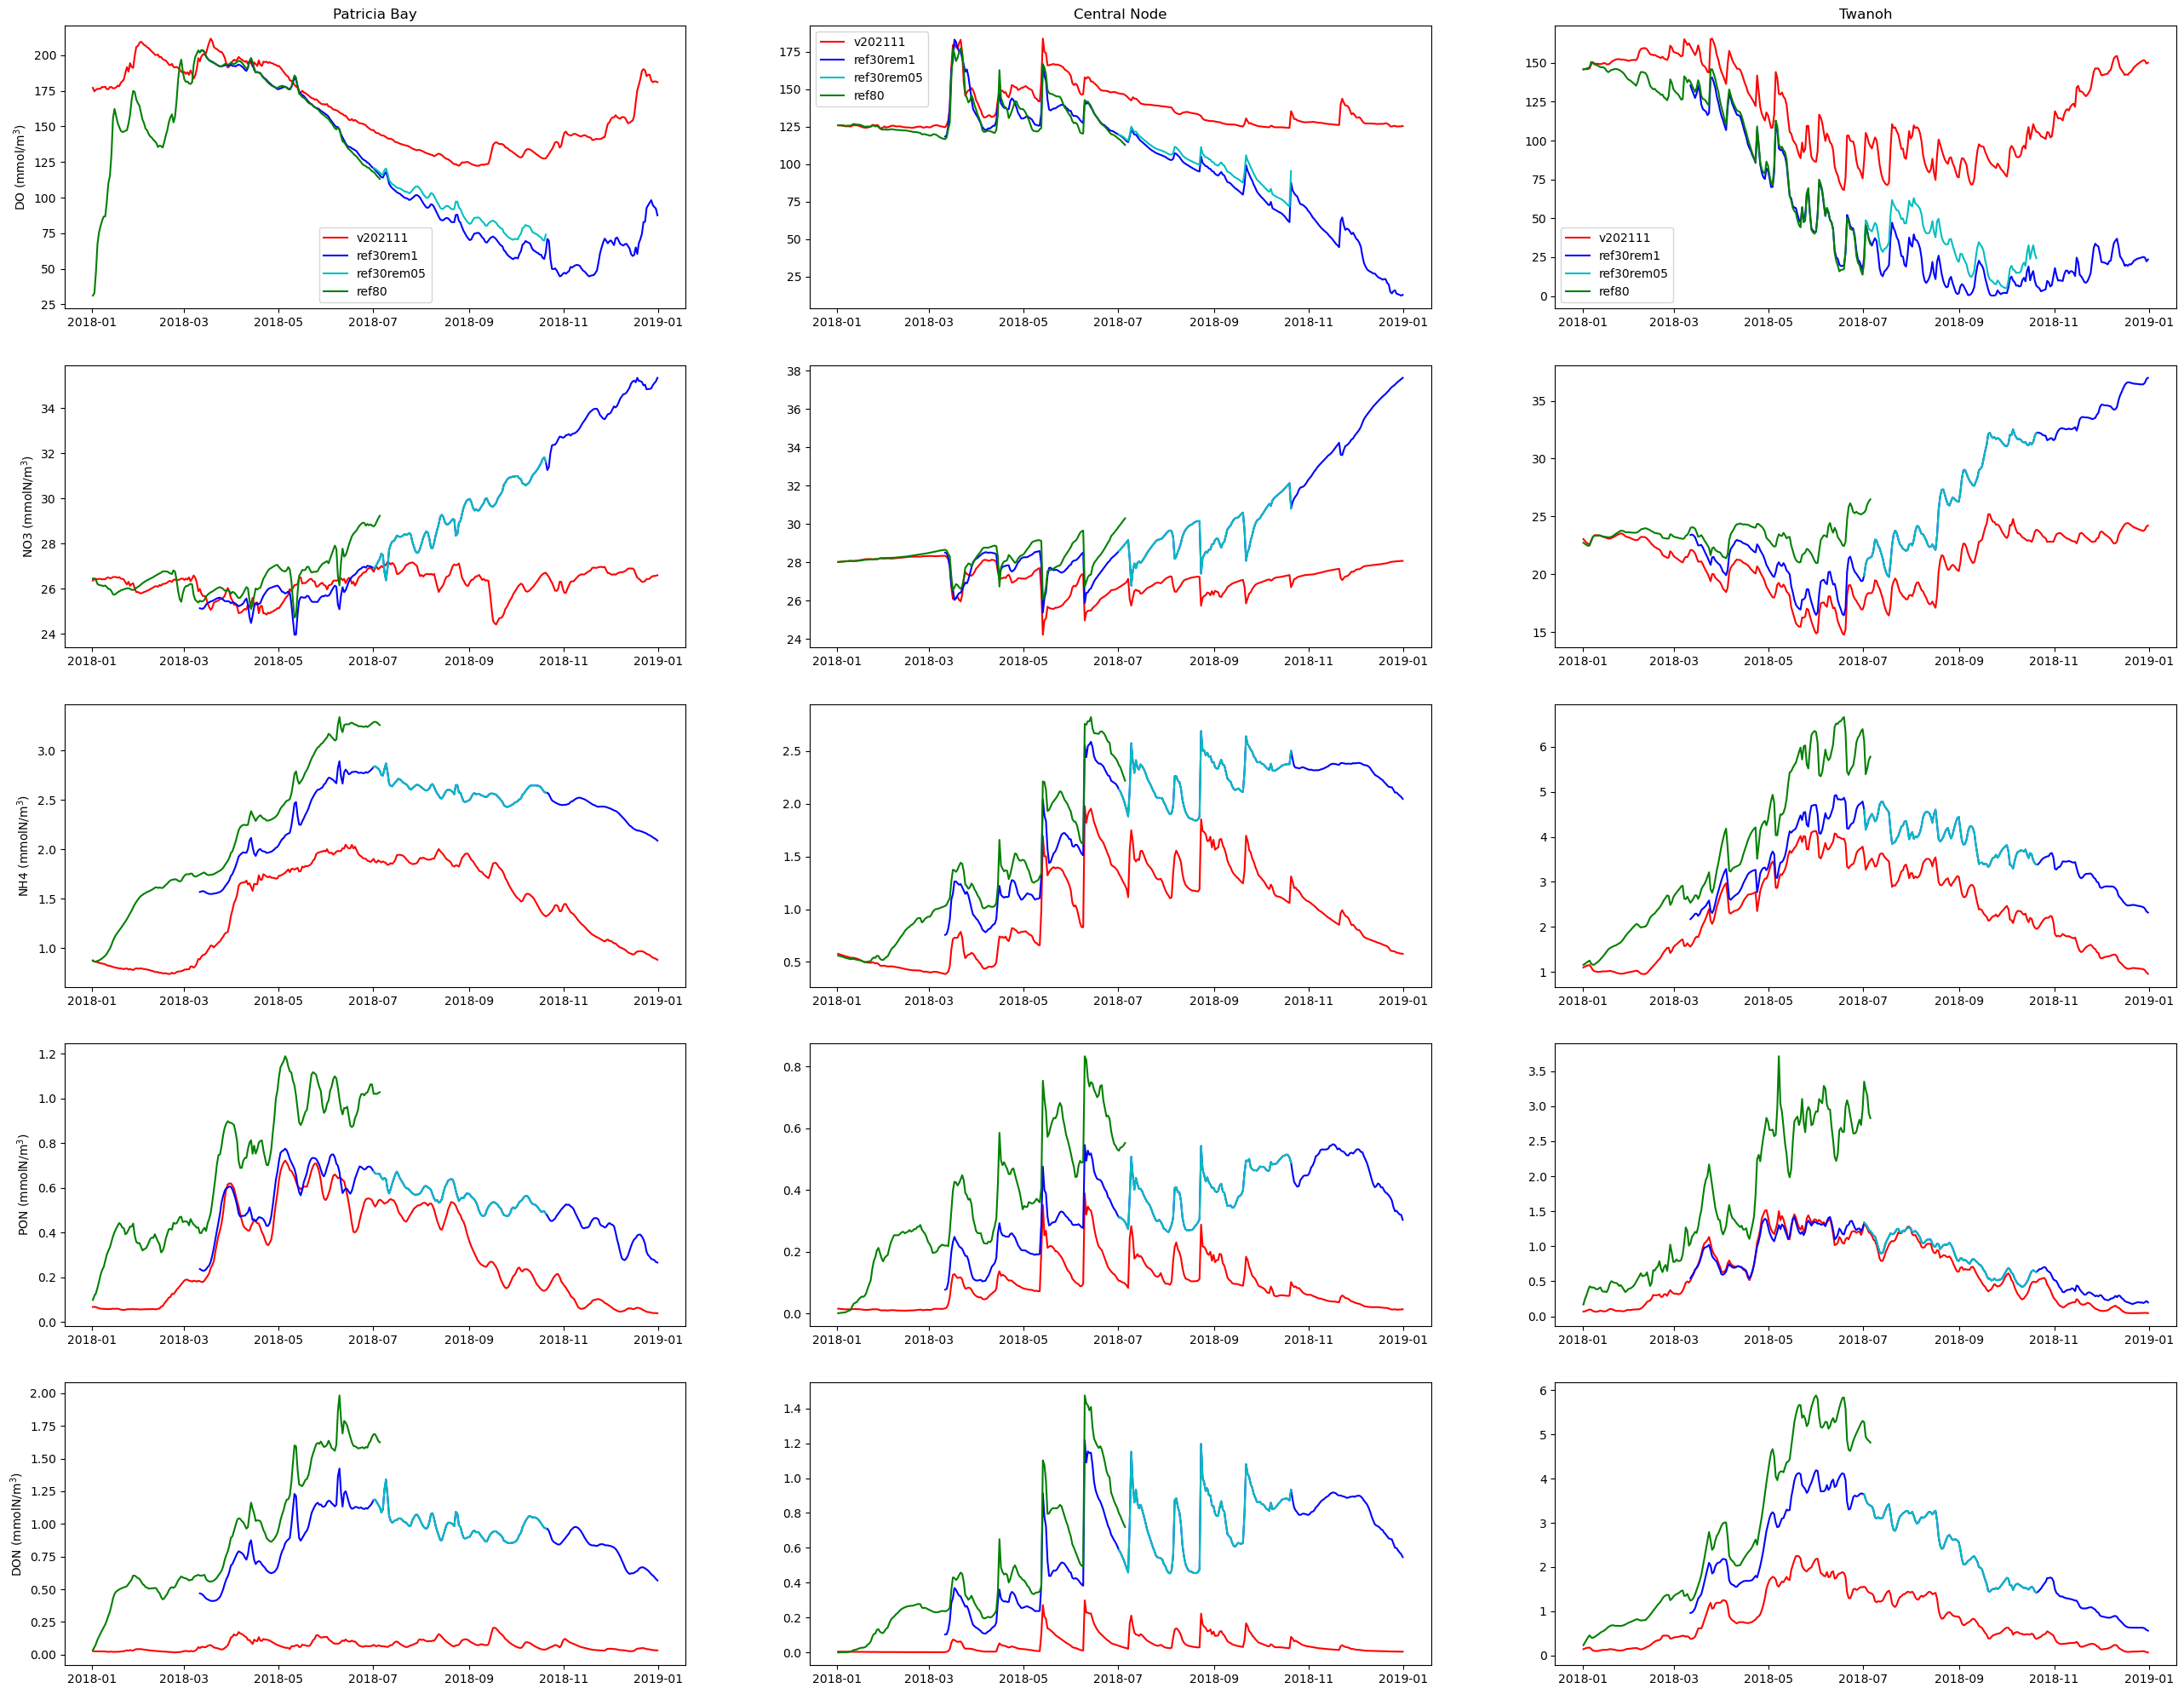

In [ ]:
print (startdate, enddate)
line, col = (5, 3)
fig, ax = plt.subplots(line, col, figsize=(32, 25))
ylabel = list(['DO (mmol/m$^3$)','NO3 (mmolN/m$^3$)','NH4 (mmolN/m$^3$)','PON (mmolN/m$^3$)','DON (mmolN/m$^3$)'])
place = list(['Patricia Bay','Central Node','Twanoh'])
for alpha in range(0, 4):
    if alpha == 0:
        dir = '/results2/SalishSea/nowcast-green.202111/'
        colors = 'r'
        labels = 'v202111'
    elif alpha==1:
        dir = '/ocean/sallen/timbucktwo/oxygen_Pref30/'
        colors = 'b'
        labels = 'ref30'
        smonth = 3
        emonth = 12
        startdate = arrow.get(syear, smonth, 11)
        enddate = arrow.get(eyear, emonth, 31)
    elif alpha==2:
        dir = '/ocean/sallen/timbucktwo/oxygen/'
        colors = 'c'
        labels = 'ref30rem05'
        smonth = 7
        emonth = 10
        startdate = arrow.get(syear, smonth, 1)
        enddate = arrow.get(eyear, emonth, 25)
    else:
        dir = '/ocean/sallen/timbucktwo/oxygen_Pref80/'
        colors = 'g'
        labels = 'ref80'
        smonth = 1
        emonth = 7
        startdate = arrow.get(syear, smonth, 1)
        enddate = arrow.get(eyear, emonth, 5)
    for j in range(0, col):
        if j==0:
            jj, ii = (353, 209)
        elif j==1:
            jj, ii = (423, 266)
        else:
            jj, ii = (72, 123)   
        first = True
        for iii, day in enumerate(arrow.Arrow.range('day', startdate, enddate)):
            year = day.year
            yr2 = day.strftime("%y")
            month = day.month
            Month = day.strftime("%b").lower()
            day = day.day
            # set up filename to follow NEMO conventions
            fchem = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_chem_T.nc'
            with xr.open_dataset(fchem) as ds_chem:
                oxy0 = ds_chem['dissolved_oxygen'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
            fbiol = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_biol_T.nc'
            with xr.open_dataset(fbiol) as ds_biol:
                nit0 = ds_biol['nitrate'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
                amm0 = ds_biol['ammonium'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
                pon0 = ds_biol['particulate_organic_nitrogen'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
                don0 = ds_biol['dissolved_organic_nitrogen'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
            if first:
                first = False
                oxy = oxy0
                pon = pon0
                don = don0
                nit = nit0
                amm = amm0
            else:
                oxy = xr.concat([oxy, oxy0], dim='time_counter')
                nit = xr.concat([nit, nit0], dim='time_counter')
                amm = xr.concat([amm, amm0], dim='time_counter')
                pon = xr.concat([pon, pon0], dim='time_counter')
                don = xr.concat([don, don0], dim='time_counter')
        for i  in range(0, line):
            if i==0:
                var = oxy
            elif i==1:
                var = nit
            elif i==2:
                var = amm
            elif i==3:
                var = pon
            elif i==4:
                var = don

            ax[i,j].plot(var.time_counter, var, color=colors, label=labels)
            ax[0,j].legend()
            ax[i,0].set_ylabel(f'{ylabel[i]}')
            ax[0,j].set_title(f'{place[j]}')
            ax[i,j].grid()


# Oxygen diff between zz_alpha_SOD (Bremin) = 50% and 100%

2018-07-01T00:00:00+00:00 2018-10-25T00:00:00+00:00


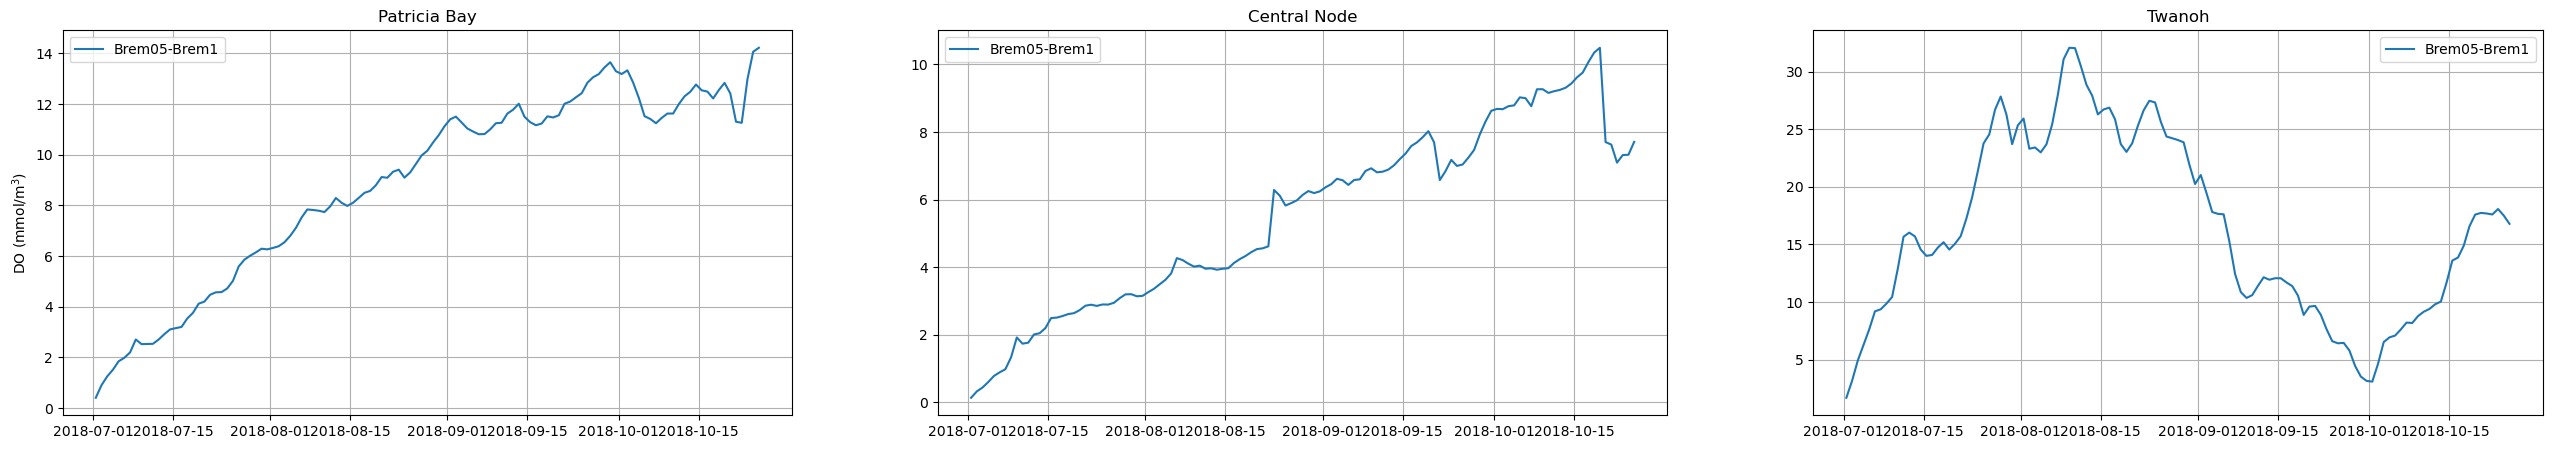

In [10]:
syear = 2018
eyear = 2018
smonth = 7
emonth = 10
startdate = arrow.get(syear, smonth, 1)
enddate = arrow.get(eyear, emonth, 25)
print (startdate, enddate)
line, col = (1, 3)
fig, ax = plt.subplots(line, col, figsize=(32, 5))
ylabel = list(['DO (mmol/m$^3$)','NO3 (mmolN/m$^3$)','NH4 (mmolN/m$^3$)','PON (mmolN/m$^3$)','DON (mmolN/m$^3$)','SMS (mmolO$_2$/m$^3$/s)'])
place = list(['Patricia Bay','Central Node','Twanoh'])
dir = '/ocean/sallen/timbucktwo/oxygen/'
dir2 = '/ocean/sallen/timbucktwo/oxygen_Pref30/'


for j in range(0, col):
    if j==0:
        jj, ii = (353, 209)
    elif j==1:
        jj, ii = (423, 266)
    else:
        jj, ii = (72, 123)   
    first = True
    for iii, day in enumerate(arrow.Arrow.range('day', startdate, enddate)):
        year = day.year
        yr2 = day.strftime("%y")
        month = day.month
        Month = day.strftime("%b").lower()
        day = day.day
        # set up filename to follow NEMO conventions
        fchem = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_chem_T.nc'
        with xr.open_dataset(fchem) as ds_chem:
            oxy0 = ds_chem['dissolved_oxygen'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
        fchem2 = f'{dir2}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_chem_T.nc'
        with xr.open_dataset(fchem2) as ds_chem2:
            oxy02 = ds_chem2['dissolved_oxygen'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
        if first:
            first = False
            oxy = oxy0
            oxy2 = oxy02
        else:
            oxy = xr.concat([oxy, oxy0], dim='time_counter')
            oxy2 = xr.concat([oxy2, oxy02], dim='time_counter')

    ax[j].plot(oxy.time_counter, oxy-oxy2, label='Brem05-Brem1')
    ax[0].set_ylabel(f'{ylabel[0]}')
    ax[j].set_title(f'{place[j]}')
    ax[j].grid()
    ax[j].legend()